In [1]:
import os
import json
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

fontSize = 12
figxsize = 6
figysize = 4
params = {
    'legend.fontsize':fontSize,
    'figure.figsize': (figxsize, figysize),
    'axes.labelsize': fontSize,
    'axes.titlesize': fontSize,
    'xtick.labelsize': fontSize,
    'ytick.labelsize': fontSize,
    'font.family': 'sans-serif',
    'font.sans-serif': ['Lucida Grande'],
    'text.usetex': True
}
plt.rcParams.update(params)

saveFig = False

# Anytown

In [2]:
hist_files = [
    '../experiments/history/anytownMaster1_vld.h5',
]
fn_suffix = 'Anytown'

In [3]:
opti_df = pd.read_hdf('../experiments/anytown_rnd_db.h5', 'results')
# ----- ----- ----- ----- -----
# TSTSPLIT
# ----- ----- ----- ----- -----
opti_df = opti_df.loc[:99]
# ----- ----- ----- ----- -----
subdfs = dict()
for file in hist_files:
    subdfs[file[23:-3]] = pd.read_hdf(file)
dqn_df = pd.concat(subdfs.values(), axis=1, keys=subdfs.keys())
idx = pd.IndexSlice

In [4]:
print(opti_df.loc[idx[:], idx[:,'reward']].mean())

nm       reward    0.785173
de       reward    0.789036
pso      reward    0.788719
fssrs    reward    0.784665
oneshot  reward    0.721698
dtype: float64


In [5]:
opti_algo = 'de'
agent_rewards = dqn_df.loc[idx[:,:], idx[:,'lastReward']]
opti_rewards = opti_df[opti_algo]['reward']
length_multiplier = agent_rewards.index.get_level_values(0).nunique()
opti_rewards_ss = pd.Series(np.tile(opti_rewards.values, 20), index=agent_rewards.index)
reward_ratio = agent_rewards.div(opti_rewards_ss, axis=0).groupby(level=0).mean()

siestas = (dqn_df.loc[idx[:,:], idx[:,'nSiesta']] == 3).astype(float).groupby(level=0).mean()

steps = dqn_df.loc[idx[:,:], idx[:,'nStep']].groupby(level=0).mean()

### Last state value / reference state value@Anytown

C:\Users\Administrator\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:25: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "-" (-> linestyle='-'). The keyword argument will take precedence.


Text(0, 0.5, '$v_\\mathrm{agent}/v_\\mathrm{opti}$')

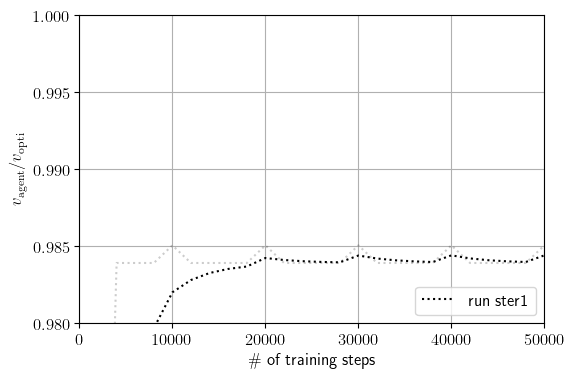

In [6]:
fig, ax = plt.subplots(figsize=(figxsize, figysize))
#colors = ['black','dodgerblue','maroon','salmon']
linestyles = [':', '-', '--', '-.']

linestyles_for_more = [
     (0, (1, 10)), # loosely dotted
     (0, (1, 1)), # dotted
     (0, (1, 1)), # densely dotted

     (0, (5, 10)), # loosely dashed
     (0, (5, 5)), # dashed
     (0, (5, 1)), # densely dashed

     (0, (3, 10, 1, 10)), # loosely dashdotted
     (0, (3, 5, 1, 5)), # dashdotted
     (0, (3, 1, 1, 1)), # densely dashdotted
    
     (0, (3, 5, 1, 5, 1, 5)), # dashdotdotted
     (0, (3, 10, 1, 10, 1, 10)), # loosely dashdotdotted
     (0, (3, 1, 1, 1, 1, 1)) # densely dashdotdotted
]

for header, linestyle in zip(reward_ratio.columns.values, linestyles):
    colid = header[0]
    ax.plot(reward_ratio[colid], '-', alpha=.2, color='black', linestyle=linestyle)
    ax.plot(reward_ratio[colid].ewm(alpha=.4).mean(),
            label='run '+colid[9:-4],
            color='black',
            linestyle=linestyle
           )
plt.legend(loc='lower right', ncol=2)
plt.grid(True)
ax.set_xlim(0, 50000)
ax.set_ylim(.98, 1.0)
plt.locator_params(axis='y', nbins=5)
ax.set_xlabel('\# of training steps')
ax.set_ylabel('$v_\mathrm{agent}/v_\mathrm{opti}$')

In [7]:
if saveFig:
    fig.savefig(fname='./figures/value_ratio_'+fn_suffix+'.pdf', format='pdf', bbox_inches='tight')

### episode lengths

C:\Users\Administrator\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:6: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "-" (-> linestyle='-'). The keyword argument will take precedence.
  


Text(0, 0.5, 'Avg. episode length (\\# of steps)')

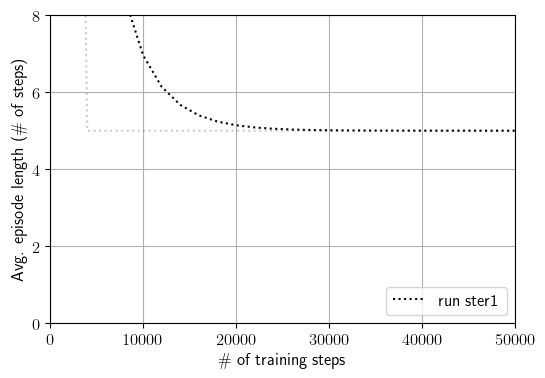

In [8]:
fig, ax = plt.subplots(figsize=(figxsize, figysize))#, tight_layout=True)
#colors = ['black','dodgerblue','maroon','salmon']
#linestyles = [':', '-', '--', '-.']
for header, linestyle in zip(reward_ratio.columns.values, linestyles):
    colid = header[0]
    ax.plot(steps[colid], '-', alpha=.2, color='black', linestyle=linestyle)
    ax.plot(steps[colid].ewm(alpha=.4).mean(),
            #label='run '+colid[-5],
            label='run '+colid[9:-4],
            color='black',
            linestyle=linestyle
           )
plt.legend(loc='lower right', ncol=2)
plt.grid(True)
ax.set_xlim(0, 50000)
ax.set_ylim(0, 8)
plt.locator_params(axis='y', nbins=5)
ax.set_xlabel('\# of training steps')
ax.set_ylabel('Avg. episode length (\# of steps)')

In [9]:
if saveFig:
    fig.savefig(fname='./figures/episode_length_'+fn_suffix+'.pdf', format='pdf', bbox_inches='tight')

# D-Town with optimized reference

In [10]:
hist_files = ['../experiments/history/dtownHO1_vld.h5',
              '../experiments/history/dtownHO2_vld.h5',
              '../experiments/history/dtownHO3_vld.h5',
              '../experiments/history/dtownHO4_vld.h5']
fn_suffix = 'Dtown'

In [11]:
opti_df = pd.read_hdf('../experiments/dtown_rnd_db.h5', 'results')
# ----- ----- ----- ----- -----
# TSTSPLIT
# ----- ----- ----- ----- -----
opti_df = opti_df.loc[:99]
# ----- ----- ----- ----- -----
subdfs = dict()
for file in hist_files:
    #subdfs[file[23:-3]] = pd.read_hdf(file)
    subdfs[file[28:31]] = pd.read_hdf(file)
dqn_df = pd.concat(subdfs.values(), axis=1, keys=subdfs.keys())
idx = pd.IndexSlice

FileNotFoundError: File ../experiments/history/dtownHO1_vld.h5 does not exist

In [ ]:
print(opti_df.loc[idx[:], idx[:,'reward']].mean())

In [ ]:
opti_algo = 'de'
agent_rewards = dqn_df.loc[idx[:,:], idx[:,'lastReward']]
opti_rewards = opti_df[opti_algo]['reward']
length_multiplier = agent_rewards.index.get_level_values(0).nunique()
opti_rewards_ss = pd.Series(np.tile(opti_rewards.values, length_multiplier), index=agent_rewards.index)
reward_ratio = agent_rewards.div(opti_rewards_ss, axis=0)
reward_ratio = reward_ratio.replace([np.inf, -np.inf], np.nan).dropna().groupby(level=0).mean()

siestas = (dqn_df.loc[idx[:,:], idx[:,'nSiesta']] == 3).astype(float).groupby(level=0).mean()

steps = dqn_df.loc[idx[:,:], idx[:,'nStep']].groupby(level=0).mean()

ValueError: Length of passed values is 2500, index implies 2000

### Last state value / reference state value@D-Town

In [ ]:
fig, ax = plt.subplots(figsize=(figxsize, figysize))
colors = ['black','dodgerblue','maroon','salmon']
linestyles = [':', '-', '--', '-.']
for header, linestyle in zip(reward_ratio.columns.values, linestyles):
    colid = header[0]
    ax.plot(reward_ratio[colid], '-', alpha=.2, color='black', linestyle=linestyle)
    ax.plot(reward_ratio[colid].ewm(alpha=.4).mean(),
            label='run '+colid[-1],
            color='black',
            linestyle=linestyle
           )
plt.legend(loc='lower right', ncol=2)
plt.grid(True)
ax.set_xlim(0, 1000000)
ax.set_ylim(0.95, 1.0)
ax.set_xlabel('\# of training steps')
ax.set_ylabel('$v_\mathrm{agent}/v_\mathrm{opti}$')
ax.xaxis.set_ticks(np.arange(0, 1000001, 200000))

In [ ]:
if saveFig:
    fig.savefig(fname='./figures/value_ratio_'+fn_suffix+'.pdf', format='pdf', bbox_inches='tight')

### episode lengths

In [ ]:
fig, ax = plt.subplots(figsize=(figxsize, figysize))#, tight_layout=True)
#colors = ['black','dodgerblue','maroon','salmon']
linestyles = [':', '-', '--', '-.']
for header, linestyle in zip(reward_ratio.columns.values, linestyles):
    colid = header[0]
    ax.plot(steps[colid], '-', alpha=.2, color='black', linestyle=linestyle)
    ax.plot(steps[colid].ewm(alpha=.4).mean(),
            label='run '+colid[-1],
            color='black',
            linestyle=linestyle
            )
plt.legend(loc='upper right', ncol=2)
plt.grid(True)
ax.set_xlim(0, 1000000)
ax.set_ylim(0, 203)
ax.set_xlabel('\# of training steps')
ax.set_ylabel('Avg. episode length (\# of steps)')
ax.xaxis.set_ticks(np.arange(0, 1000001, 200000))

In [ ]:
if saveFig:
    fig.savefig(fname='./figures/episode_length_'+fn_suffix+'.pdf', format='pdf', bbox_inches='tight')

# D-Town with one-shot reference

In [ ]:
hist_files = ['../experiments/history/dtownOS1_vld.h5',
              '../experiments/history/dtownOS2_vld.h5',
              '../experiments/history/dtownOS3_vld.h5',
              '../experiments/history/dtownOS4_vld.h5']
fn_suffix = 'DtownOS'

In [ ]:
opti_df = pd.read_hdf('../experiments/dtown_rnd_db.h5', 'results')
# ----- ----- ----- ----- -----
# TSTSPLIT
# ----- ----- ----- ----- -----
opti_df = opti_df.loc[:99]
# ----- ----- ----- ----- -----
subdfs = dict()
for file in hist_files:
    #subdfs[file[23:-3]] = pd.read_hdf(file)
    subdfs[file[30:-7]] = pd.read_hdf(file)
dqn_df = pd.concat(subdfs.values(), axis=1, keys=subdfs.keys())
idx = pd.IndexSlice

In [ ]:
print(opti_df.loc[idx[:], idx[:,'reward']].mean())

In [ ]:
opti_algo = 'oneshot'
agent_rewards = dqn_df.loc[idx[:,:], idx[:,'lastReward']]
opti_rewards = opti_df[opti_algo]['reward']
length_multiplier = agent_rewards.index.get_level_values(0).nunique()
opti_rewards_ss = pd.Series(np.tile(opti_rewards.values, length_multiplier), index=agent_rewards.index)
reward_ratio = agent_rewards.div(opti_rewards_ss, axis=0)
reward_ratio = reward_ratio.replace([np.inf, -np.inf], np.nan).dropna().groupby(level=0).mean()

siestas = (dqn_df.loc[idx[:,:], idx[:,'nSiesta']] == 3).astype(float).groupby(level=0).mean()

steps = dqn_df.loc[idx[:,:], idx[:,'nStep']].groupby(level=0).mean()

### Last state value / reference state value@D-Town

In [ ]:
fig, ax = plt.subplots(figsize=(figxsize, figysize))
#colors = ['black','dodgerblue','maroon','salmon']
linestyles = [':', '-', '--', '-.']
for header, linestyle in zip(reward_ratio.columns.values, linestyles):
    colid = header[0]
    ax.plot(reward_ratio[colid], '-', alpha=.2, color='black', linestyle=linestyle)
    ax.plot(reward_ratio[colid].ewm(alpha=.4).mean(),
            label='run '+str(int(colid[-1])),
            color='black',
            linestyle=linestyle
            )
plt.legend(loc='lower right', ncol=2)
plt.grid(True)
ax.set_xlim(0, 1000000)
ax.set_ylim(1, 1.05)
ax.set_xlabel('\# of training steps')
#ax.set_ylabel('$v_\mathrm{agent}/v_\mathrm{opti}$, -')
ax.set_ylabel('$v_\mathrm{agent}/v_\mathrm{opti}$')
ax.xaxis.set_ticks(np.arange(0, 1000001, 200000))

In [ ]:
if saveFig:
    fig.savefig(fname='./figures/value_ratio_'+fn_suffix+'.pdf', format='pdf', bbox_inches='tight')

### episode lengths

In [ ]:
fig, ax = plt.subplots(figsize=(figxsize, figysize))#, tight_layout=True)
#colors = ['black','dodgerblue','maroon','salmon']
linestyles = [':', '-', '--', '-.']
for header, linestyle in zip(reward_ratio.columns.values, linestyles):
    colid = header[0]
    ax.plot(steps[colid], '-', alpha=.2, color='black', linestyle=linestyle)
    ax.plot(steps[colid].ewm(alpha=.4).mean(),
            label='run '+str(int(colid[-1])),
            color='black',
            linestyle=linestyle
            )
plt.legend(loc='upper right', ncol=2)
plt.grid(True)
ax.set_xlim(0, 1000000)
ax.set_ylim(0, 105)
ax.set_xlabel('\# of training steps')
ax.set_ylabel('Avg. episode length (\# of steps)')
ax.xaxis.set_ticks(np.arange(0, 1000001, 200000))

In [ ]:
if saveFig:
    fig.savefig(fname='./figures/episode_length_'+fn_suffix+'.pdf', format='pdf', bbox_inches='tight')

# Training episode reward@D-Town

In [ ]:
hist_files = ['../experiments/history/run-dtownHO_1-tag-episode_reward.json',
              '../experiments/history/run-dtownHO_2-tag-episode_reward.json',
              '../experiments/history/run-dtownHO_3-tag-episode_reward.json',
              '../experiments/history/run-dtownHO_4-tag-episode_reward.json']
fn_suffix = 'Dtown'

In [ ]:
subdfs = dict()
for file in hist_files:
    with open(file) as fin:
        data = json.load(fin)
    print(data[-1])
    step = []
    reward = []
    for elem in data:
        step.append(elem[1])
        reward.append(elem[2])
    subdfs['run '+file[35]] = pd.DataFrame({'step': step, 'reward':reward})
df = pd.concat(subdfs.values(), axis=1, keys=subdfs.keys())

In [ ]:
with open(hist_files[0]) as fin:
    data = json.load(fin)
print(data[-1])

In [ ]:
fig, ax = plt.subplots(figsize=(figxsize, figysize))
#colors = ['black','dodgerblue','maroon','salmon']
markers = ['.', '4', 'x', '|']
linestyles = [':', '-', '--', '-.']
plotFreq = 20
for runid, linestyle in zip(df.columns.levels[0], linestyles):
    plotFreq = 5
    ax.plot(df[runid]['step'], df[runid]['reward'], alpha=.1, color='black', label='', linewidth=.3, linestyle=linestyle)
    ax.plot(df[runid]['step'][:200:plotFreq], df[runid]['reward'].ewm(alpha=.1).mean()[:200:plotFreq],
            color='black',
            label=runid,
            #marker=marker,
            linestyle=linestyle
           # linewidth=1
           )
    plotFreq = 20
    ax.plot(df[runid]['step'][200::plotFreq], df[runid]['reward'].ewm(alpha=.1).mean()[200::plotFreq],
            color='black',
            label='',
            #marker=marker,
            linestyle=linestyle
           # linewidth=1
           )
plt.legend()
plt.grid(True)
ax.set_xlim(0, 1000000)
ax.set_ylim(-60, 40)
ax.set_xlabel('\# of training steps')
ax.set_ylabel('Episode reward')
ax.xaxis.set_ticks(np.arange(0, 1000001, 250000))

In [ ]:
if saveFig:
    fig.savefig(fname='./figures/trn_episode_reward_'+fn_suffix+'.pdf', format='pdf', bbox_inches='tight')

# Training reward@D-Town

In [ ]:
hist_files = ['../experiments/history/run-dtownHO_1-tag-input_info_rewards.json',
              '../experiments/history/run-dtownHO_2-tag-input_info_rewards.json',
              '../experiments/history/run-dtownHO_3-tag-input_info_rewards.json',
              '../experiments/history/run-dtownHO_4-tag-input_info_rewards.json']
fn_suffix = 'Dtown'

In [ ]:
subdfs = dict()
for file in hist_files:
    with open(file) as fin:
        data = json.load(fin)
    step = []
    reward = []
    for elem in data:
        step.append(elem[1])
        reward.append(elem[2])
    subdfs['run '+file[35]] = pd.DataFrame({'step': step, 'reward':reward})
df = pd.concat(subdfs.values(), axis=1, keys=subdfs.keys())

In [ ]:
fig, ax = plt.subplots(figsize=(figxsize, figysize))
colors = ['black','dodgerblue','maroon','salmon']
color = 'black'
markers = ['.', '4', 'x', '|']
linestyles = [':', '-', '--', '-.']
plotFreq = 10
for runid, linestyle in zip(df.columns.levels[0], linestyles):
    ax.plot(df[runid]['step'], df[runid]['reward'], alpha=.1, color='black', label='', linewidth=.3, linestyle=linestyle)
    ax.plot(df[runid]['step'][::plotFreq], df[runid]['reward'].ewm(alpha=.1).mean()[::plotFreq],
            color='black',
            label=runid,
            linestyle=linestyle)
            #marker=marker,
            #linewidth=.25)
plt.legend(loc='upper left', ncol=2)
plt.grid(True)
ax.set_xlim(0, 1000000)
ax.set_ylim(-0.5, 1.0)
ax.set_xlabel('\# of training steps')
ax.set_ylabel('Reward')
ax.xaxis.set_ticks(np.arange(0, 1000001, 250000))

In [ ]:
if saveFig:
    fig.savefig(fname='./figures/trn_reward_'+fn_suffix+'.pdf', format='pdf', bbox_inches='tight')

# Optimization results

In [ ]:
import seaborn as sns

In [ ]:
rewdf = opti_df.loc[idx[:], idx[:,"reward"]]
rewdf.columns = rewdf.columns.droplevel(1)
rewdf = rewdf.rename(columns={
    'pso': 'PSO',
    'oneshot': 'One-shot RT',
    'fssrs': 'FSSRS',
    'nm': 'Nelder-Mead',
    'de': 'DE'})

In [ ]:
fig, ax = plt.subplots(figsize=(figxsize, figysize))
plt.grid(True)
ax.set_ylim(.55, .75)
ax.set_xlabel('Optimization techniques')
ax.set_ylabel('Value of state')
rewdf = rewdf.replace(0.0, np.nan).dropna()
sns.swarmplot(data=rewdf, size=3, ax=ax, linewidth=0, alpha=.4, color='black')
sns.boxplot(data=rewdf, ax=ax, boxprops={'alpha':1}, color='grey')
plt.locator_params(axis='y', nbins=5)

In [ ]:
if saveFig:
    fig.savefig(fname='./figures/opti_values.pdf', format='pdf', bbox_inches='tight')

In [ ]:
reldf = rewdf.div(rewdf['DE'], axis=0)

In [ ]:
fig, ax = plt.subplots(figsize=(figxsize, figysize))
plt.grid(True)
ax.set_ylim(.85, 1.05)
ax.set_xlabel('Optimization techniques')
ax.set_ylabel('Relative value of state compared to DE')
reldf = reldf.replace(0.0, np.nan).dropna()
sns.swarmplot(data=reldf.drop('DE', axis=1), size=3, ax=ax, linewidth=0, alpha=.4, color='black')
sns.boxplot(data=reldf.drop('DE', axis=1), ax=ax, boxprops={'alpha':1}, color='grey')
plt.locator_params(axis='y', nbins=5)

In [ ]:
if saveFig:
    fig.savefig(fname='./figures/rel_opti_values.pdf', format='pdf', bbox_inches='tight')

# Probability density functions

In [ ]:
import scipy.stats as stats

x_vals = np.linspace(0, 1.4, 1001)

uni_lo = .3
uni_hi = 1.1
norm_lo = .7
norm_hi = 1.3
norm_mean = 1.0
norm_std = 1.0

uniform_dist = stats.uniform(loc=uni_lo, scale=(uni_hi-uni_lo))
normal_dist = stats.truncnorm((norm_lo-norm_mean)/norm_std, (norm_hi-norm_mean)/norm_std, loc=norm_mean, scale=norm_std)

In [ ]:
fig, ax = plt.subplots(figsize=(5, 4))
plt.grid(True)
ax.plot(x_vals, normal_dist.pdf(x_vals), 'k--', label='relative demand multiplier')
ax.plot(x_vals, uniform_dist.pdf(x_vals), 'k-', label='total demand multiplier')
ax.set_ylim(0, 1.4)
ax.set_ylim(0, 1.75)
ax.set_xlabel('x')
ax.set_ylabel('probability density of x')
plt.legend()

In [ ]:
if saveFig:
    fig.savefig(fname='./figures/proba_densities.pdf', format='pdf', bbox_inches='tight')